# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    return (-1.5*f(x)+2*f(x+h)-0.5*f(x+2*h))/h

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [3]:
x = 0
print('    h          err    h**2')
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g %7.4g" % (h, err, h**2))

    h          err    h**2
0.010000 -- -0.0002  0.0001
0.001000 --  -2e-06   1e-06
0.000100 --  -2e-08   1e-08
0.000010 --  -2e-10   1e-10


As we expected, error is O(h^2), (the expected result is 0).

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [4]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

#Two-point one-sided rule
def der2(f,x,h):
    return f(x + h) / h

One-sided    2-point 3-point
Least error   3e-09   4e-12
Step(h)       7e-09   1e-06


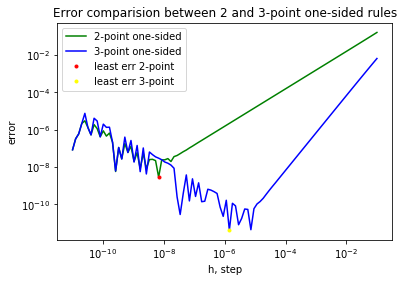

In [5]:
x = 1
err2 = []; err3 = []
hScale = 1/(10**(np.linspace(1, 11, 100)))
for h in hScale:
    err3.append(abs(deriv(f,x,h)-fder(x)))
    err2.append(abs(der2(f,x,h)-fder(x)))

ind3 = np.argmin(err3)
ind2 = np.argmin(err2)

#Plot
plt.plot(hScale, err2, '-', color='green', label='2-point one-sided')
plt.plot(hScale, err3, '-', color='blue', label='3-point one-sided')
plt.plot(hScale[ind2], err2[ind2], '.', color='red', label='least err 2-point')
plt.plot(hScale[ind3], err3[ind3], '.', color='yellow', label='least err 3-point')

#Plot settings
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('Error comparision between 2 and 3-point one-sided rules')
plt.xlabel('h, step')
plt.ylabel('error')

#Table
print('One-sided    2-point 3-point')
print('Least error', "%7.0g %7.0g"%(err2[ind2], err3[ind3]))
print('Step(h)    ', "%7.0g %7.0g" % (hScale[ind2], hScale[ind3]) )

### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [6]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


As we can see, the dependence is linear. Let's try to see that from the Taylor's series:
$$f(x+h)=\sum_{k=0}^n \frac{f^{(k)}(x)}{k!}(h)^k$$
We chose x=h.
So
$$f^{(3)}(h)\sim \frac{1}{h}(h)^2=h$$
So linear view matches our expectations. Let's check that it doesn't work with x!=0:

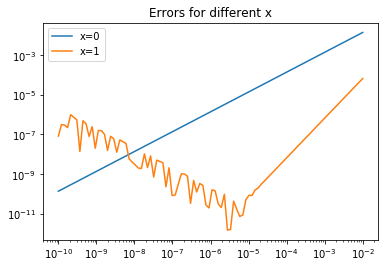

In [7]:
x0 = 0
x1 = 1
hScale = 1/(10**(np.linspace(2, 10, 100)))
err0 = [abs(deriv(f, x0, h) - fder(x0)) for h in hScale]
err1 = [abs(deriv(f, x1, h) - fder(x1)) for h in hScale]    
plt.plot(hScale, err0, label='x=0')
plt.plot(hScale, err1, label='x=1')
plt.xscale('log')
plt.yscale('log')
plt.title('Errors for different x')
plt.legend()

Log scale saves linear plots, so blue line accepts our expectations.

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [8]:
def midpoint_rule(func, a, b, eps):
    N=1
    width = (b-a)/N
    m = np.array([a+(2*k-1)/(2*N)*(b-a) for k in range(1, N+1)])
    M = (b-a)/N*np.sum(func(m))
    while N==1 or (abs(Mprev-M)>eps and N<10**50):
        Mprev=M
        N*=2
        width = (b-a)/N
        m = np.array([a+(2*k-1)/(2*N)*(b-a) for k in range(1, N+1)])
        M = (b-a)/N*np.sum(func(m))
    if N<10**50:
        return M, N
    return "N is too big, sorry("

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


In [9]:
I, N = midpoint_rule(lambda x: x**2, 1, 4, 0.1)
print('Number of slivers:', N)
print('Calculation result:', I)
print('Real result:', 21)

Number of slivers: 16
Calculation result: 20.9912109375
Real result: 21


### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

Let's estimate the singularity: for x->0 integrand function approcsimatelty equal $$\frac{1}{\sqrt(x)}$$
$$
\int_0^1\! \frac{1}{\sqrt{x}}\, dx = \int_0^1\!\, d{\sqrt{x}} = 2
$$

In [10]:
I, N = midpoint_rule(lambda x:np.sin(np.sqrt(x))/x, 0, 1, 0.0001)
I1, N1 = midpoint_rule(lambda x:np.sin(np.sqrt(x))/x - 1/np.sqrt(x) + 2, 0, 1, 0.0001)

In [11]:
print('                 Integral value       Number of slivers')
print('straightforward ', I, '     ',N)
print('smart           ', I1,'      ', N1)
print("Wolfram's result", 1.89217 )

                 Integral value       Number of slivers
straightforward  1.8919572892043148       8388608
smart            1.892113005639548        32
Wolfram's result 1.89217


As we can see, results are very close, but considering the singularity allows to calculate this integral much more faster and better.